In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import random
import math
import time
import func3

device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda:2


## Problem 1:

In [11]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_x = torch.Tensor( testset.data ) / 256.0 - 0.5
test_x = test_x.to(device)
test_y = torch.Tensor( testset.targets ).long()
test_y = test_y.to(device)
train_x = torch.Tensor( trainset.data ) / 256.0 - 0.5
train_x = train_x.to(device)
train_y = torch.Tensor( trainset.targets ).long()
train_y = train_y.to(device)


In [12]:
linearModel = func3.LinearSoftmaxRegression()
func3.trainNetwork(linearModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 292.6331472992897 test loss: 2.362586498260498
epochs: 2 total Loss over Batches: 149.59864157438278 test loss: 0.7456124424934387
epochs: 3 total Loss over Batches: 116.3641626238823 test loss: 0.5223174691200256
epochs: 4 total Loss over Batches: 102.14037799835205 test loss: 0.4398377537727356
epochs: 5 total Loss over Batches: 94.18075799942017 test loss: 0.39749956130981445
epochs: 6 total Loss over Batches: 87.99008566141129 test loss: 0.36961817741394043
epochs: 7 total Loss over Batches: 84.29403468966484 test loss: 0.35123592615127563
epochs: 8 total Loss over Batches: 80.89384752511978 test loss: 0.33833593130111694
epochs: 9 total Loss over Batches: 79.41340984404087 test loss: 0.3288516700267792
epochs: 10 total Loss over Batches: 78.21174429357052 test loss: 0.31956636905670166
epochs: 11 total Loss over Batches: 75.73208974301815 test loss: 0.3137400150299072
epochs: 12 total Loss over Batches: 75.09038946032524 test loss: 0.307855635881

(11.24160885810852, 0.2876797914505005, 0.2856301963329315)

In [17]:
def imshow(img):
    img = img /256
    plt.imshow( img )
    plt.show()

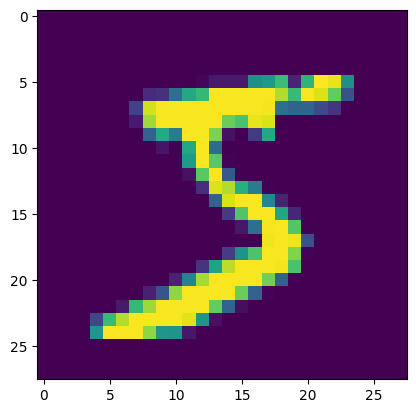

tensor(5)
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   

tensor([[1.9420e-03, 1.8037e-05, 1.5633e-03,  ..., 2.5707e-03, 1.2374e-03,
         6.7841e-04],
        [9.9957e-01, 7.4244e-10, 9.9715e-06,  ..., 4.1991e-06, 1.1254e-05,
         3.5811e-06],
        [3.0274e-04, 4.7430e-04, 1.0935e-02,  ..., 1.0952e-02, 1.8270e-03,
         2.8046e-02],
        ...,
        [6.3624e-05, 3.7484e-05, 1.1338e-06,  ..., 1.5814e-04, 5.8414e-03,
         2.1193e-03],
        [3.3794e-02, 3.2287e-05, 8.0647e-03,  ..., 1.7570e-03, 3.8840e-04,
         1.9459e-03],
        [1.2424e-01, 8.7677e-05, 9.2345e-03,  ..., 2.7331e-03, 6.2928e-01,
         1.2974e-01]], device='cuda:2', grad_fn=<SoftmaxBackward0>)

In [18]:
imshow(trainset.data[0])
print(trainset.targets[0])
print(trainset.data[0])
torch.softmax(linearModel.forward(train_x), dim=1)

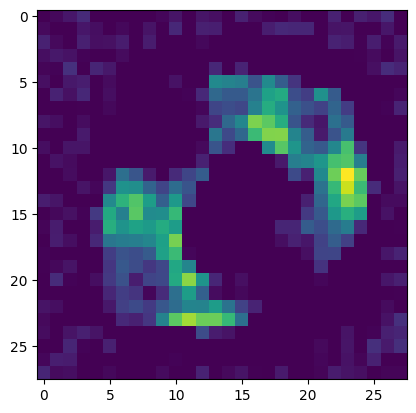

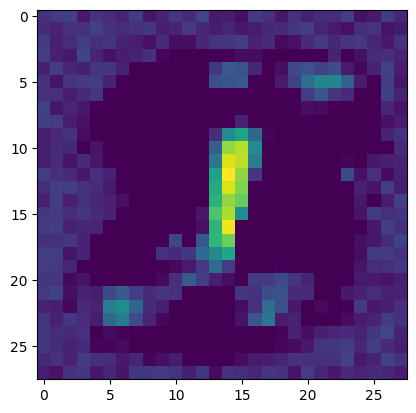

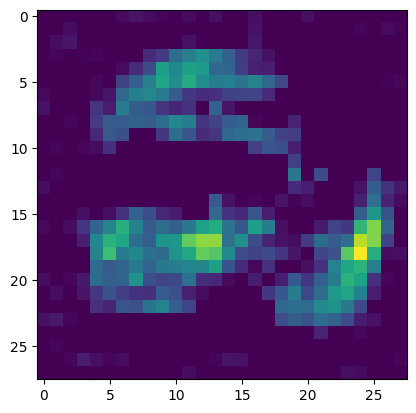

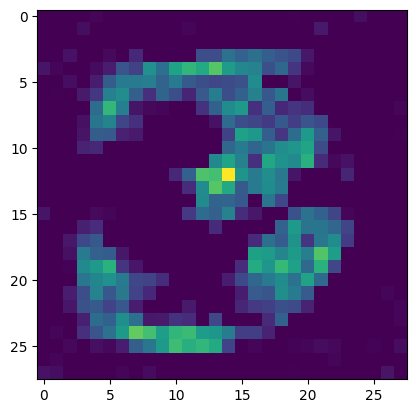

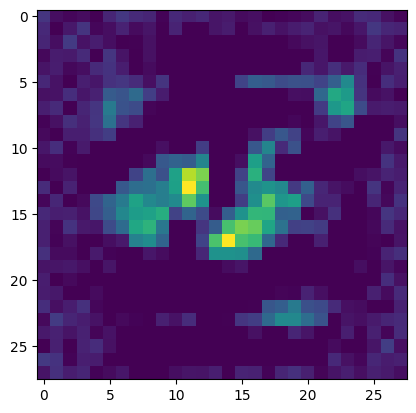

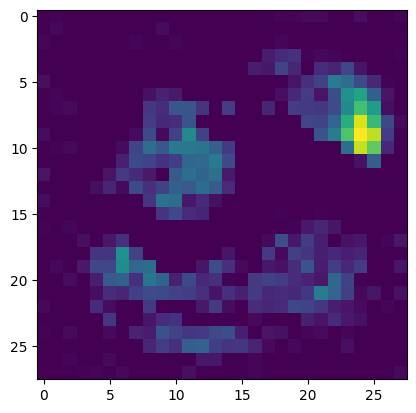

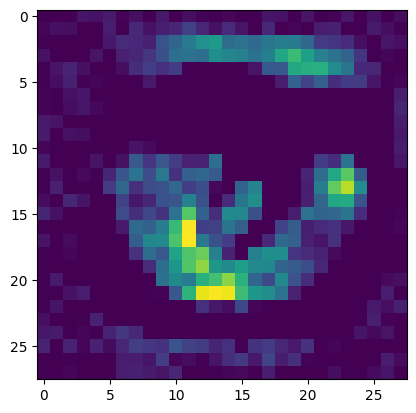

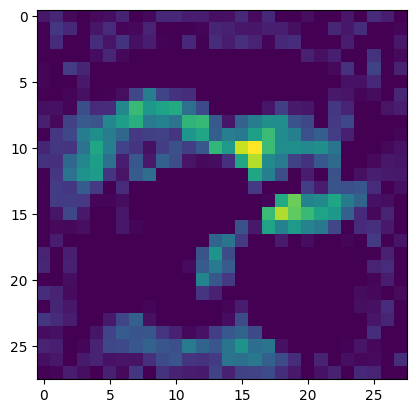

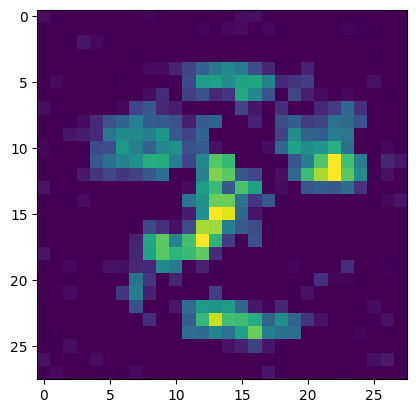

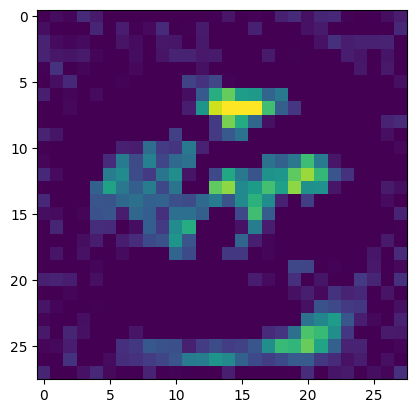

In [19]:
for j in range(10):
    # with torch.no_grad():
    picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
    # picTry.requires_grad
    # normalizer = nn.LayerNorm((28,28)).to(device)
    optimizer = optim.Adam([picTry], lr = 0.001, weight_decay = 0.00001)
    # relu = nn.ReLU().to(device)
    for i in range(150000):
        optimizer.zero_grad()
        loss = torch.nn.CrossEntropyLoss()(linearModel((torch.clamp(picTry, min = 0.0001, max = 1).to(device))-0.5),torch.tensor([j], device=device))
        loss.backward()
        optimizer.step()
        if i % 10000 == 0 and False:
            imshow(256*picTry[0].cpu().detach().numpy())
            # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
            print(picTry)
            print(loss.item())
    imshow(256*torch.clamp(picTry, min = 0.0001, max = 1)[0].cpu().detach().numpy())

In [16]:
bestModel = func3.badVGGDec()
func3.trainNetwork(bestModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 118.60065384209156 test loss: 2.3694028854370117
epochs: 2 total Loss over Batches: 45.09227529168129 test loss: 0.2545919716358185
epochs: 3 total Loss over Batches: 32.27271991223097 test loss: 0.18306756019592285
epochs: 4 total Loss over Batches: 26.444505497813225 test loss: 0.13031812012195587
epochs: 5 total Loss over Batches: 21.777249079197645 test loss: 0.117317333817482
epochs: 6 total Loss over Batches: 20.36241869442165 test loss: 0.10840777307748795
epochs: 7 total Loss over Batches: 16.845130841247737 test loss: 0.1151907816529274
epochs: 8 total Loss over Batches: 14.962714394554496 test loss: 0.09906143695116043
epochs: 9 total Loss over Batches: 15.288068363443017 test loss: 0.09114750474691391
epochs: 10 total Loss over Batches: 13.088630798272789 test loss: 0.08201263099908829
epochs: 11 total Loss over Batches: 11.882564993575215 test loss: 0.08250787854194641
epochs: 12 total Loss over Batches: 11.21587154082954 test loss: 0.0940

(20.541916131973267, 0.02781415544450283, 0.08459551632404327)

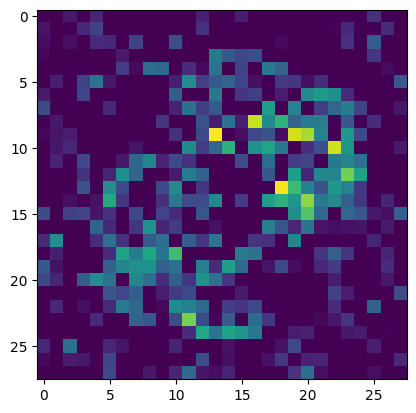

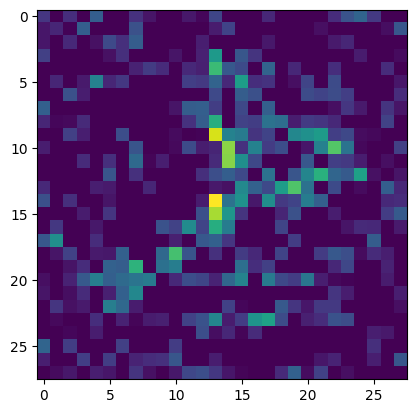

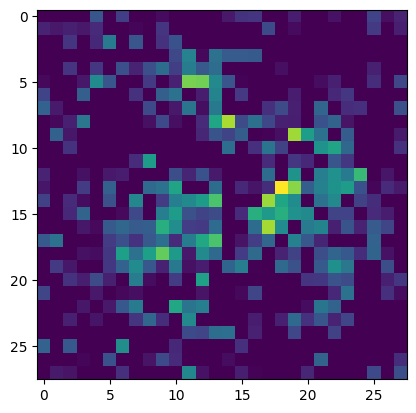

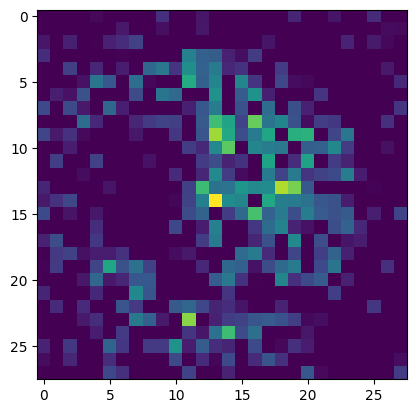

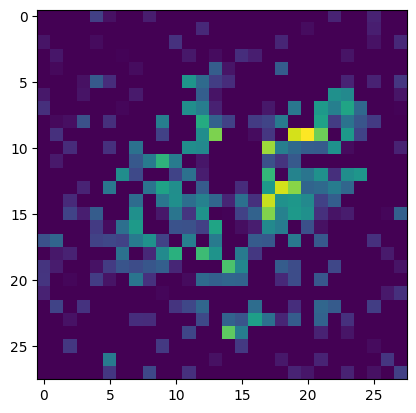

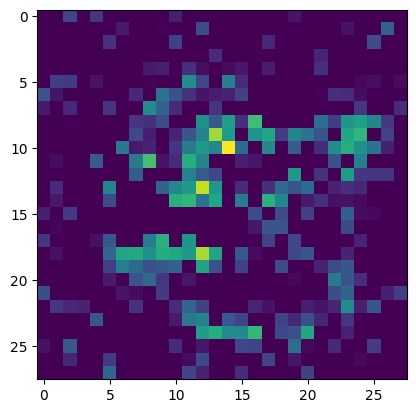

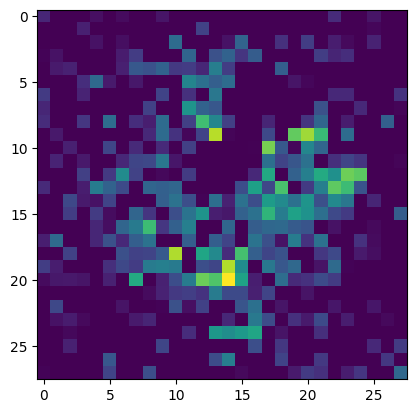

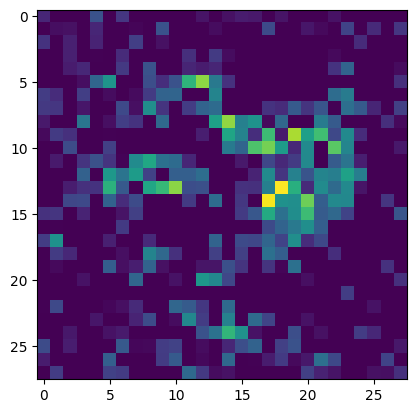

In [ ]:
for j in range(10):
    picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
    # normalizer = nn.LayerNorm((28,28)).to(device)
    optimizer = optim.Adam([picTry], lr = 0.001, weight_decay = 0.00001)
    # relu = nn.ReLU().to(device)
    for i in range(150000):
        optimizer.zero_grad()
        loss = torch.nn.CrossEntropyLoss()(bestModel((torch.clamp(picTry, min = 0.0001, max = 1).to(device))-0.5),torch.tensor([j], device=device))
        loss.backward()
        optimizer.step()
        if i % 10000 == 0 and False:
            imshow(256*picTry[0].cpu().detach().numpy())
            # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
            print(picTry)
            print(loss.item())
    imshow(256*torch.clamp(picTry, min = 0.0001, max = 1)[0].cpu().detach().numpy())